# Random forests
### Pros:
1. **Reduces Overfitting**: Averages multiple trees, preventing overfitting.
2. **Handles Missing Data**: Can handle missing values without imputation.
3. **Works Well with High-Dimensional Data**: Can model complex relationships.
4. **Feature Importance**: Identifies significant features for predictions.
5. **Robust to Noisy Data**: More stable compared to a single decision tree.

### Cons:
1. **Computationally Expensive**: Training multiple trees requires significant resources.
2. **Less Interpretability**: Harder to interpret than a single decision tree.
3. **Memory Intensive**: Storing multiple trees requires more memory.
4. **Slower Predictions**: Making predictions can be slower than simpler models.

In [7]:
#Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.datasets import load_breast_cancer

In [8]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

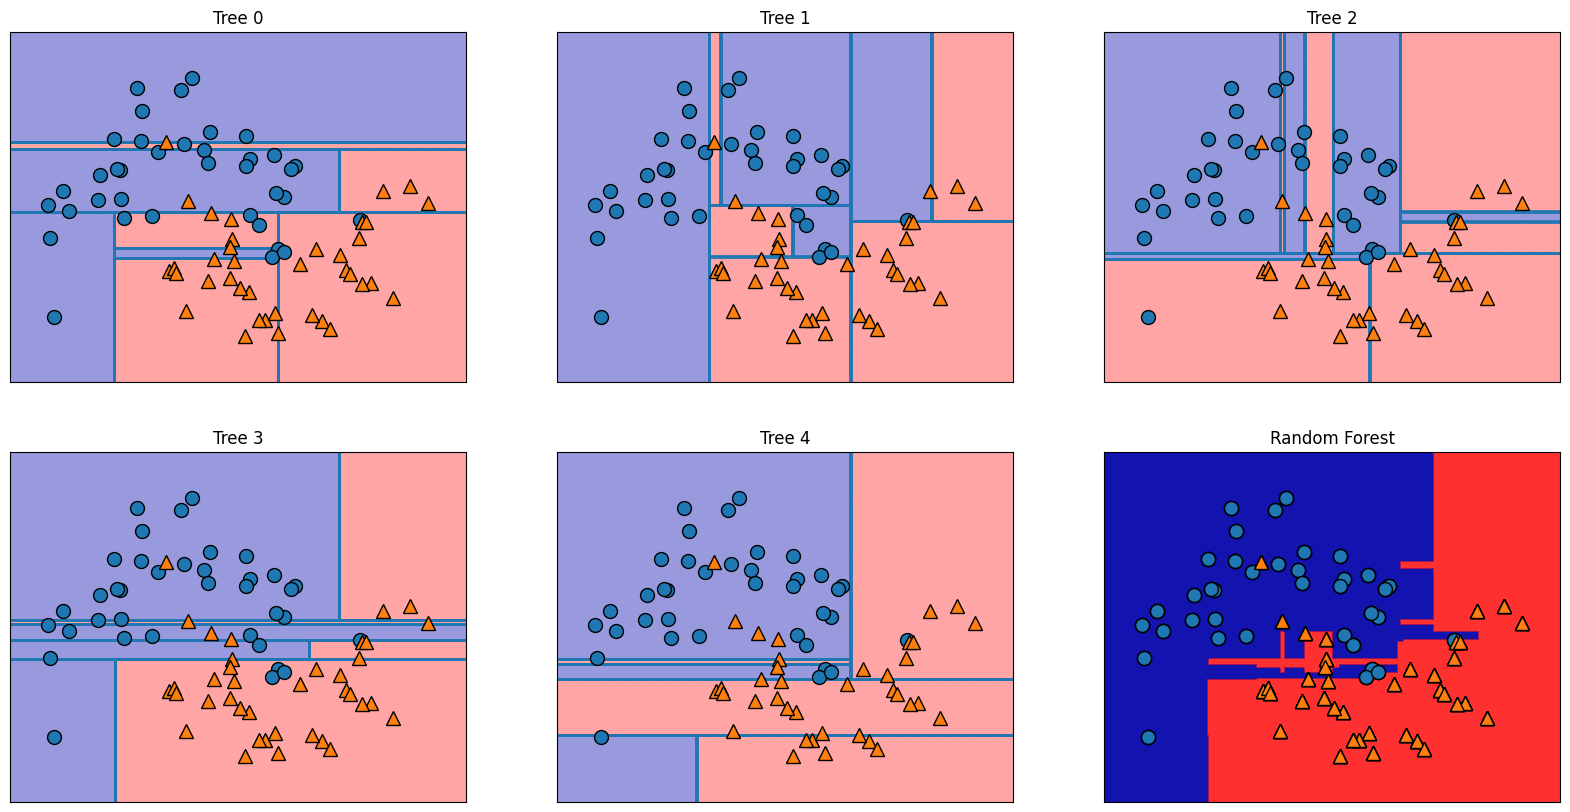

In [9]:
#Plotting the decision boundaries
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
    alpha=.4)
    axes[-1, -1].set_title("Random Forest")
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

### Using the breast cancer dateset with 100 trees in the forest

In [10]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


The random forest gives us an accuracy of 97%, better than the linear models or a single decision tree, without tuning any parameters. We could adjust the max_fea tures setting, or apply pre-pruning as we did for the single decision tree. However, often the default parameters of the random forest already work quite well.

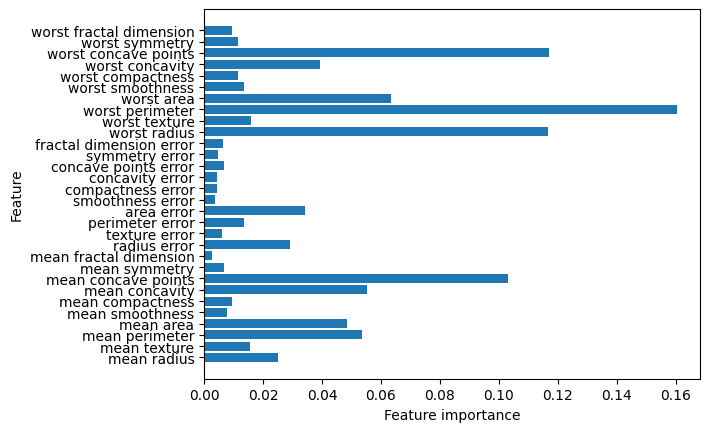

In [11]:
#Feature importance in Random Forest
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(forest)

Similarly to the single decision tree, the random forest also gives a lot of importance to the “worst radius” feature, but it actually chooses “worst perim‐
eter” to be the most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.